In [5]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


In [6]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [7]:
# LOAD DATA
data = pd.read_csv("supply_chain_data.csv")



In [8]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [9]:
# DATA UNDERSTANDING
data.shape


(100, 24)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [11]:
#Statistical Summary
data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [12]:
#Missing Values
data.isnull().sum()


Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [13]:
data = data.dropna()

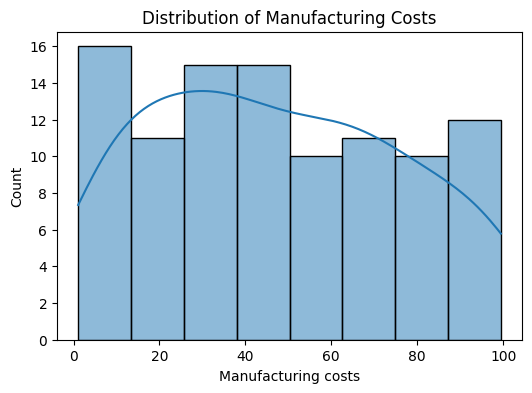

In [14]:
#DATA VISUALIZATION
plt.figure(figsize=(6,4))
sns.histplot(data['Manufacturing costs'], kde=True)
plt.title("Distribution of Manufacturing Costs")
plt.show()

In [15]:
numeric_data = data.select_dtypes(include=np.number)


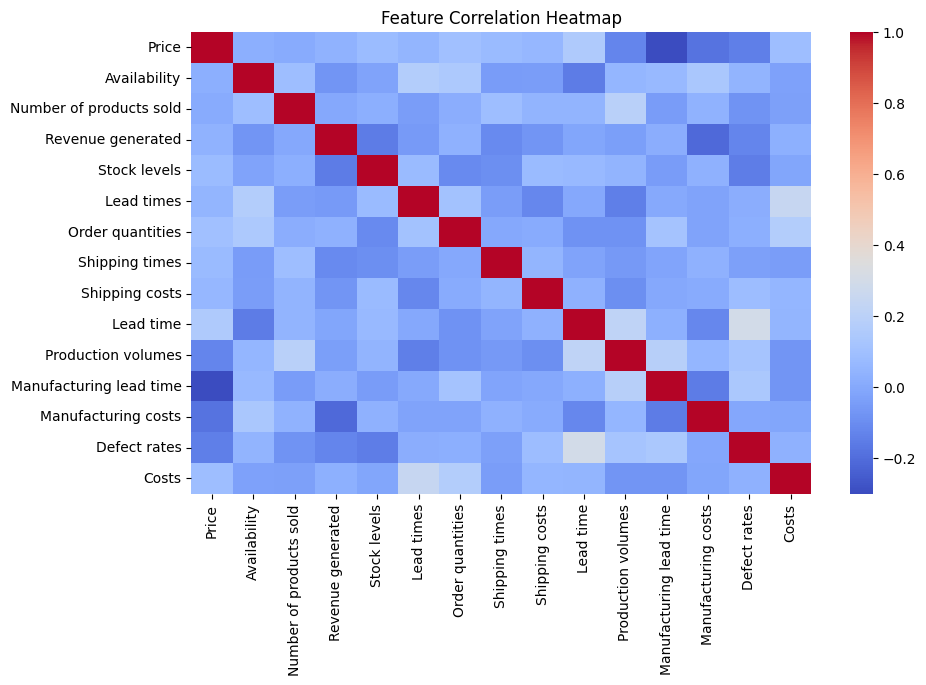

In [16]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [17]:
# DATA PREPROCESSING
time_cols = [
    'Lead times',
    'Shipping times',
    'Manufacturing lead time'
]

data[time_cols] = data[time_cols].apply(pd.to_numeric, errors='coerce')


In [18]:
# Encode Categorical Columns
cat_cols = data.select_dtypes(include='object').columns
data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)


In [19]:
# FEATURE & TARGET SPLIT
X = data_encoded.drop(columns=['Manufacturing costs'])
y = data_encoded['Manufacturing costs']


In [20]:
# TRAIN–TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42)

In [21]:
#FEATURE SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
#MODEL SELECTION
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=200),
    "Extra Trees": ExtraTreesRegressor(n_estimators=200),
    "Gradient Boosting": GradientBoostingRegressor(),
    "KNN": KNeighborsRegressor(5),
    "SVR": SVR(kernel='rbf')
}


In [23]:
# MODEL TRAINING & EVALUATION
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results.append([name, mse, r2])


c:\Users\Rasmi Ranjan Behera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.832e+01, tolerance: 6.686e+00
  model = cd_fast.enet_coordinate_descent(


In [24]:
results_df = pd.DataFrame(
    results,
    columns=["Model", "MSE", "R2 Score"]
).sort_values("MSE")

results_df


,Model,MSE,R2 Score
8,SVR,920.498552,-0.224408
2,Lasso Regression,1030.641946,-0.370916
1,Ridge Regression,1042.072166,-0.386120
0,Linear Regression,1044.353370,-0.389154
7,KNN,1062.472502,-0.413256
4,Random Forest,1089.589616,-0.449326
6,Gradient Boosting,1271.775193,-0.691661
5,Extra Trees,1583.847987,-1.106767
3,Decision Tree,1740.163068,-1.314691


In [25]:
#BEST MODEL IDENTIFICATION
best_model = results_df.iloc[0]

print(" Best Model:", best_model["Model"])
print(" Lowest MSE:", best_model["MSE"])
print(" Highest R2:", best_model["R2 Score"])


 Best Model: SVR
 Lowest MSE: 920.49855198968
 Highest R2: -0.22440796890559178


# VISUAL COMPARISON

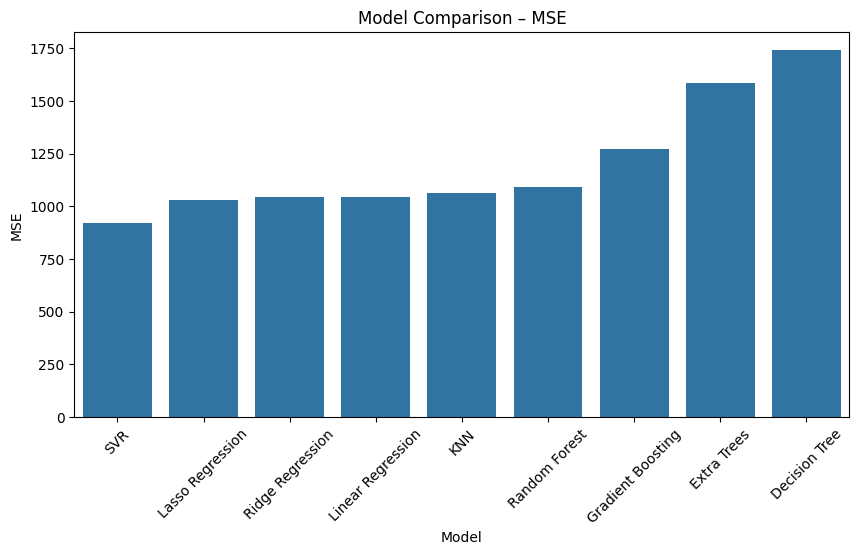

In [26]:
#MSE Comparison
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="MSE", data=results_df)
plt.xticks(rotation=45)
plt.title("Model Comparison – MSE")
plt.show()

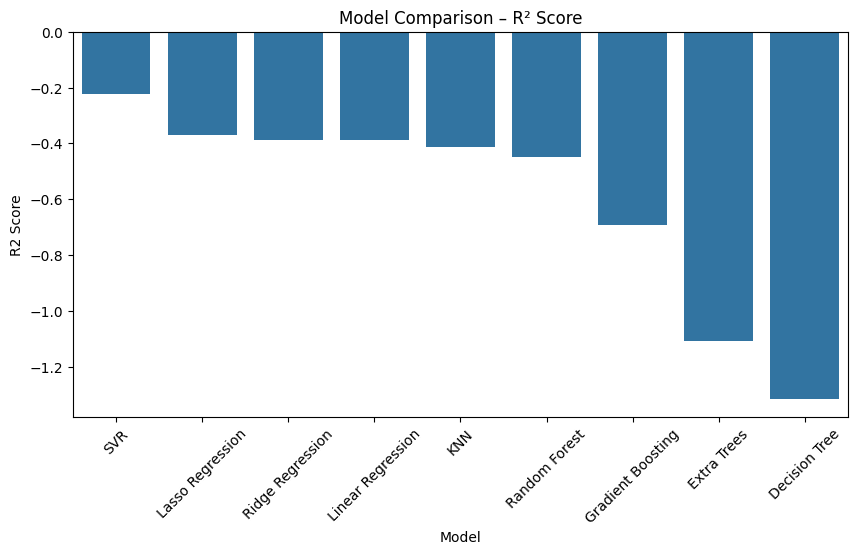

In [27]:
#R² Score Comparison
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="R2 Score", data=results_df)
plt.xticks(rotation=45)
plt.title("Model Comparison – R² Score")
plt.show()

In [28]:
sns.set_style("whitegrid")
sns.set_context("talk")

plt.rcParams['figure.facecolor'] = '#f4f6f7'
plt.rcParams['axes.facecolor'] = '#ffffff'


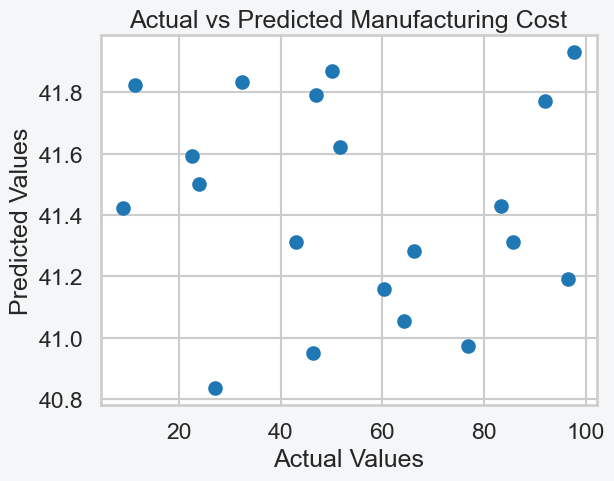

In [29]:
#ACTUAL vs PREDICTED (BEST MODEL)
best_model_instance = models[best_model["Model"]]
best_model_instance.fit(X_train_scaled, y_train)
best_preds = best_model_instance.predict(X_test_scaled)

plt.scatter(y_test, best_preds)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Manufacturing Cost")
plt.show()


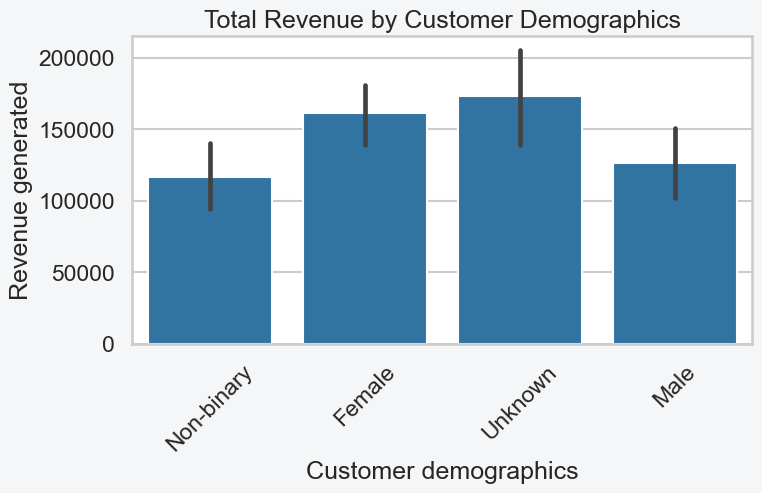

In [30]:
#Revenue Generated by Customer Segment
plt.figure(figsize=(8,4))
sns.barplot(data=data, x='Customer demographics', y='Revenue generated', estimator=sum)
plt.title("Total Revenue by Customer Demographics")
plt.xticks(rotation=45)
plt.show()


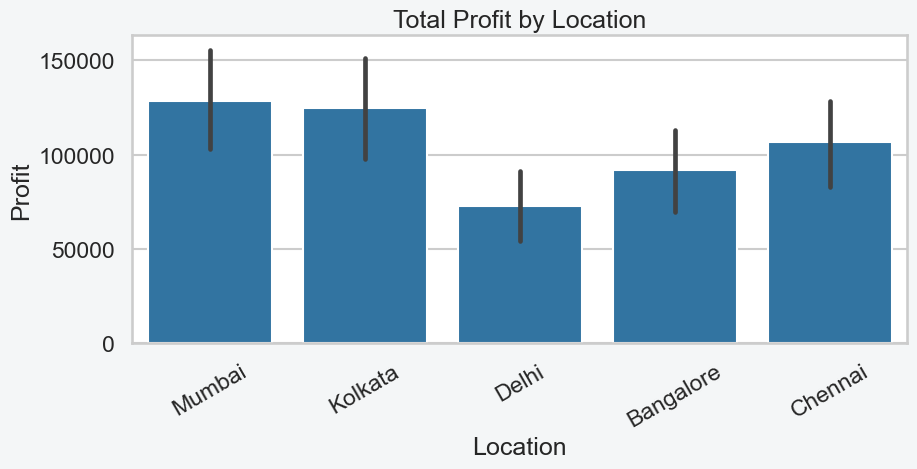

In [31]:
# Profit by Region
data['Profit'] = data['Revenue generated'] - data['Costs']

plt.figure(figsize=(10,4))
sns.barplot(data=data, x='Location', y='Profit', estimator=sum)
plt.xticks(rotation=30)
plt.title("Total Profit by Location")
plt.show()

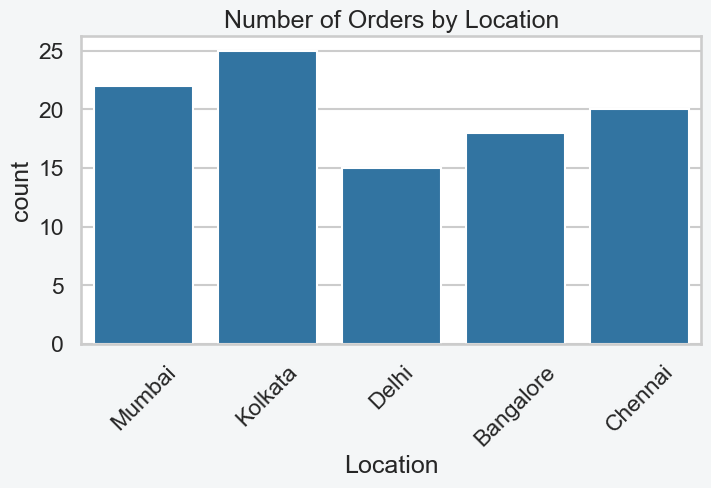

In [32]:
#Orders by Location (Count Plot)
plt.figure(figsize=(8,4))
sns.countplot(data=data, x='Location')
plt.xticks(rotation=45)
plt.title("Number of Orders by Location")
plt.show()

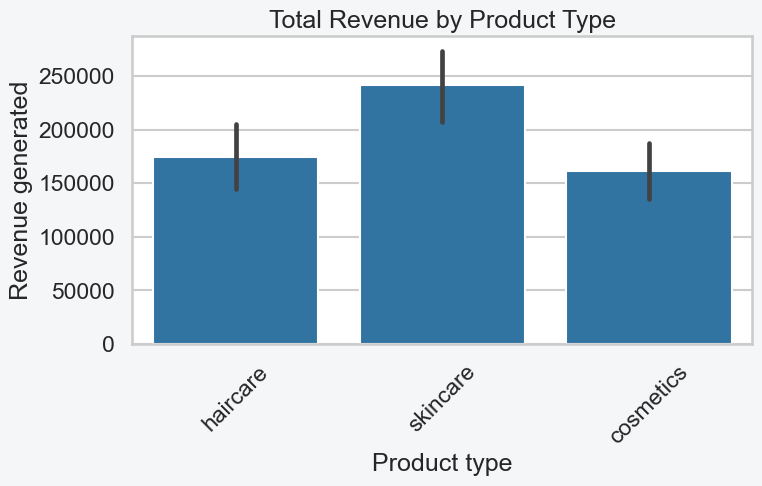

In [33]:
# Revenue by Product Type (Bar Chart)
plt.figure(figsize=(8,4))
sns.barplot(data=data,
            x='Product type',
            y='Revenue generated',
            estimator=sum)
plt.xticks(rotation=45)
plt.title("Total Revenue by Product Type")
plt.show()

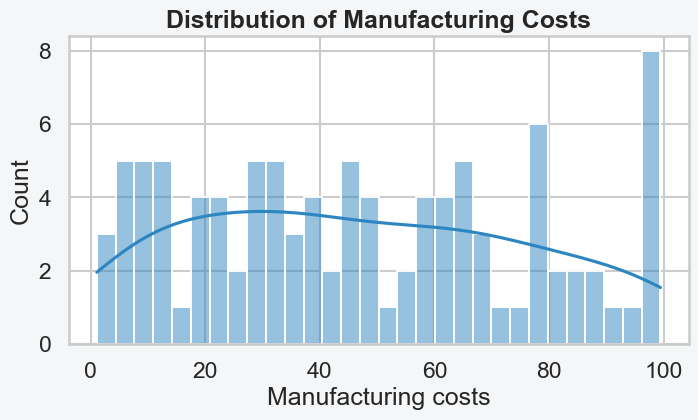

In [34]:
# Manufacturing Cost by Product Type (Box Plot)
plt.figure(figsize=(8,4))
sns.histplot(data['Manufacturing costs'],
             bins=30,
             kde=True,
             color="#2E86C1")
plt.title("Distribution of Manufacturing Costs", weight='bold')
plt.show()

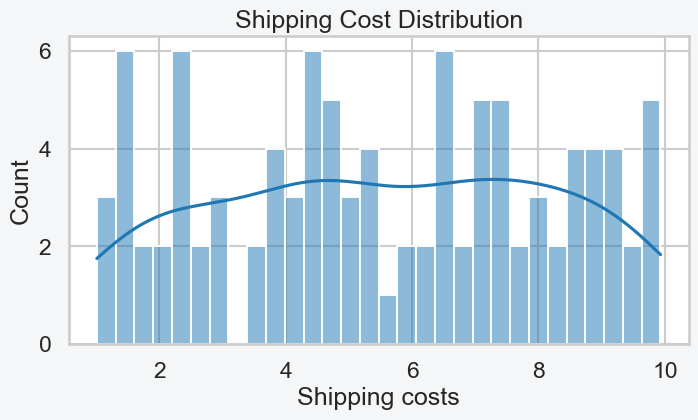

In [35]:
#Shipping Cost Distribution
plt.figure(figsize=(8,4))
sns.histplot(data['Shipping costs'], bins=30, kde=True)
plt.title("Shipping Cost Distribution")
plt.show()

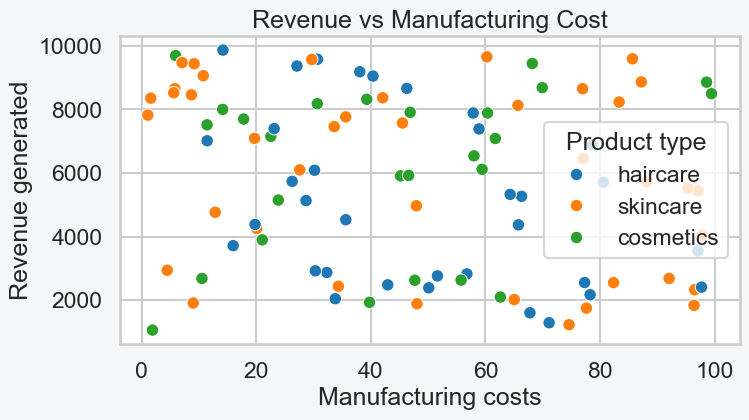

In [36]:
#Revenue vs Manufacturing Cost (Scatter)
plt.figure(figsize=(8,4))
sns.scatterplot(data=data,
                x='Manufacturing costs',
                y='Revenue generated',
                hue='Product type')
plt.title("Revenue vs Manufacturing Cost")
plt.show()

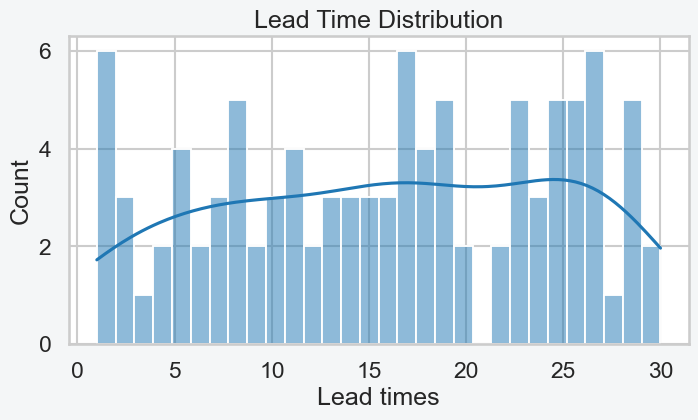

In [37]:
#Lead Time Distribution
plt.figure(figsize=(8,4))
sns.histplot(data['Lead times'], bins=30, kde=True)
plt.title("Lead Time Distribution")
plt.show()

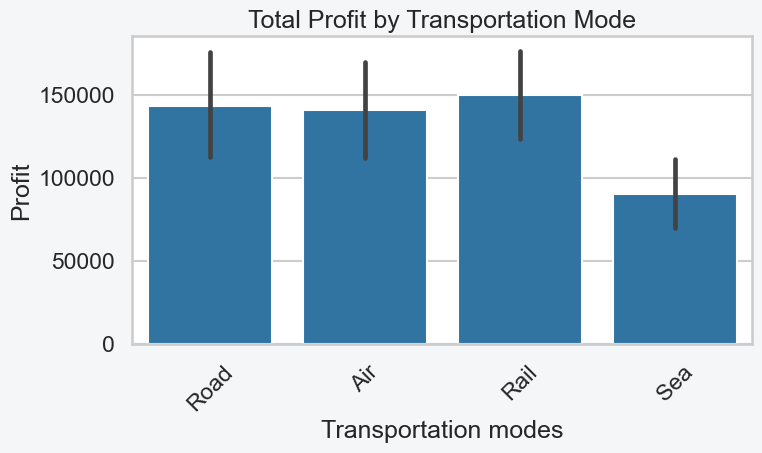

In [38]:
#Shipping Mode Impact on Profit
plt.figure(figsize=(8,4))
sns.barplot(data=data,
            x='Transportation modes',
            y='Profit',
            estimator=sum)
plt.xticks(rotation=45)
plt.title("Total Profit by Transportation Mode")
plt.show()

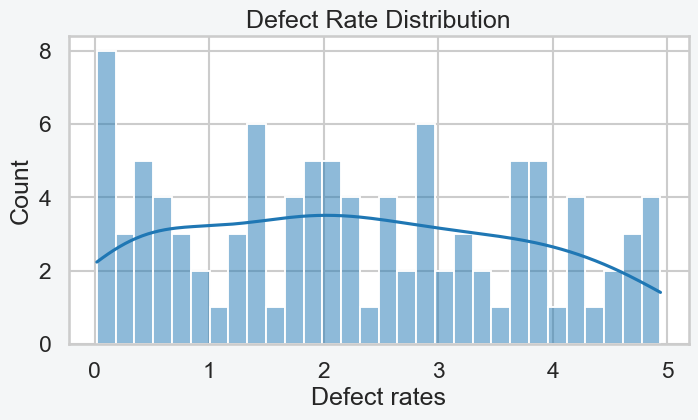

In [39]:
#Defect Rate Distribution
plt.figure(figsize=(8,4))
sns.histplot(data['Defect rates'], bins=30, kde=True)
plt.title("Defect Rate Distribution")
plt.show()

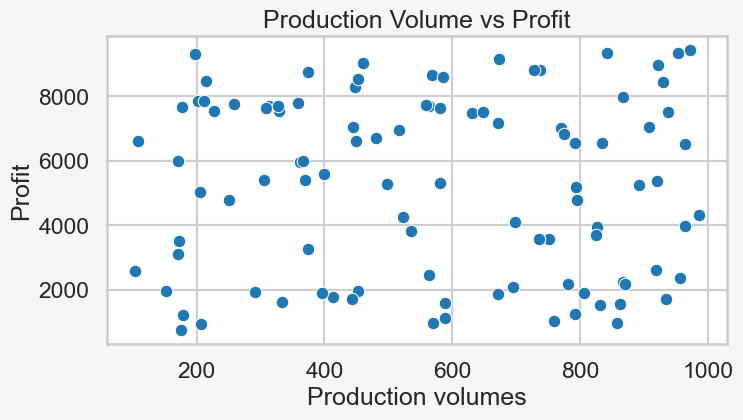

In [40]:
#Production Volume vs Profit
plt.figure(figsize=(8,4))
sns.scatterplot(data=data,
                x='Production volumes',
                y='Profit')
plt.title("Production Volume vs Profit")
plt.show()

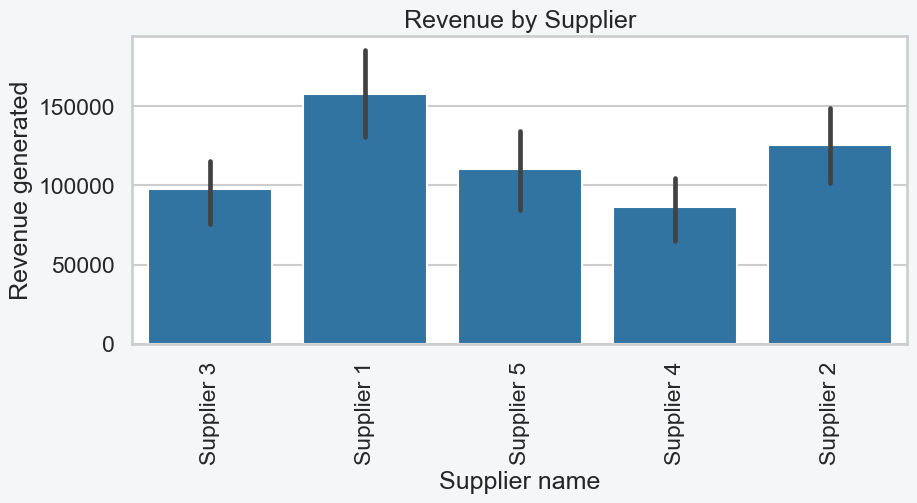

In [41]:
#Supplier-wise Revenue
plt.figure(figsize=(10,4))
sns.barplot(data=data,
            x='Supplier name',
            y='Revenue generated',
            estimator=sum)
plt.xticks(rotation=90)
plt.title("Revenue by Supplier")
plt.show()

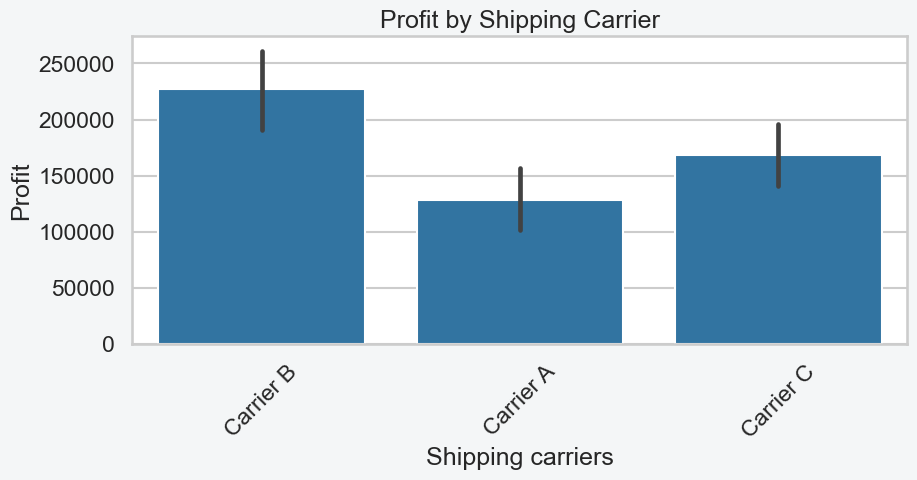

In [42]:
#Shipping Carrier Performance
plt.figure(figsize=(10,4))
sns.barplot(data=data,
            x='Shipping carriers',
            y='Profit',
            estimator=sum)
plt.xticks(rotation=45)
plt.title("Profit by Shipping Carrier")
plt.show()

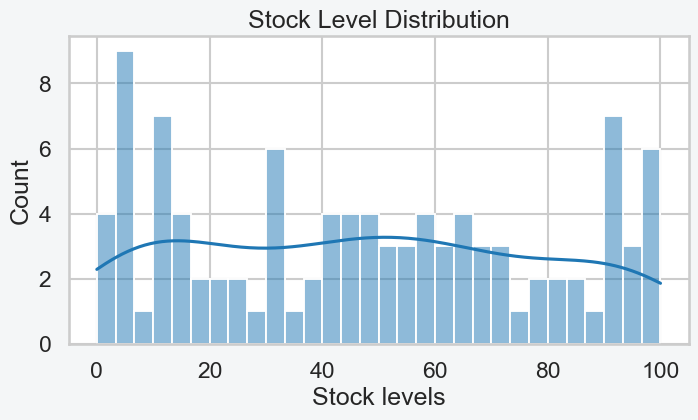

In [43]:
#Stock Level Distribution
plt.figure(figsize=(8,4))
sns.histplot(data['Stock levels'], bins=30, kde=True)
plt.title("Stock Level Distribution")
plt.show()

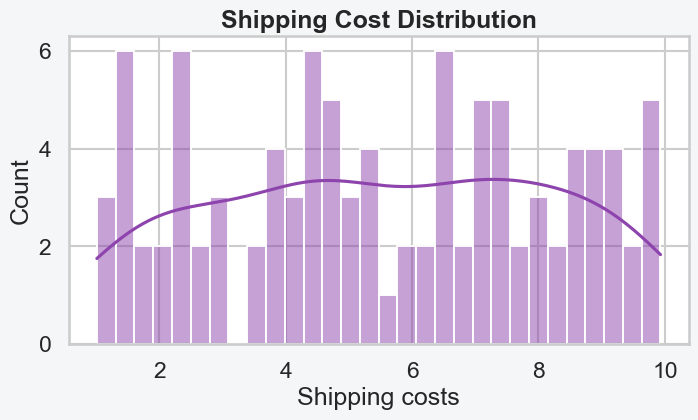

In [44]:
plt.figure(figsize=(8,4))
sns.histplot(data['Shipping costs'],
             bins=30,
             kde=True,
             color="#8E44AD")
plt.title("Shipping Cost Distribution", weight='bold')
plt.show()

In [45]:

data['Profit_Status'] = data['Profit'].apply(lambda x: 1 if x > 0 else 0)
categ_cols = [
    'Customer demographics',
    'Location',
    'Product type',
    'Transportation modes',
    'Supplier name',
    'Shipping carriers'
]


C:\Users\Rasmi Ranjan Behera\AppData\Local\Temp\ipykernel_15404\3726513213.py:14: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.countplot(


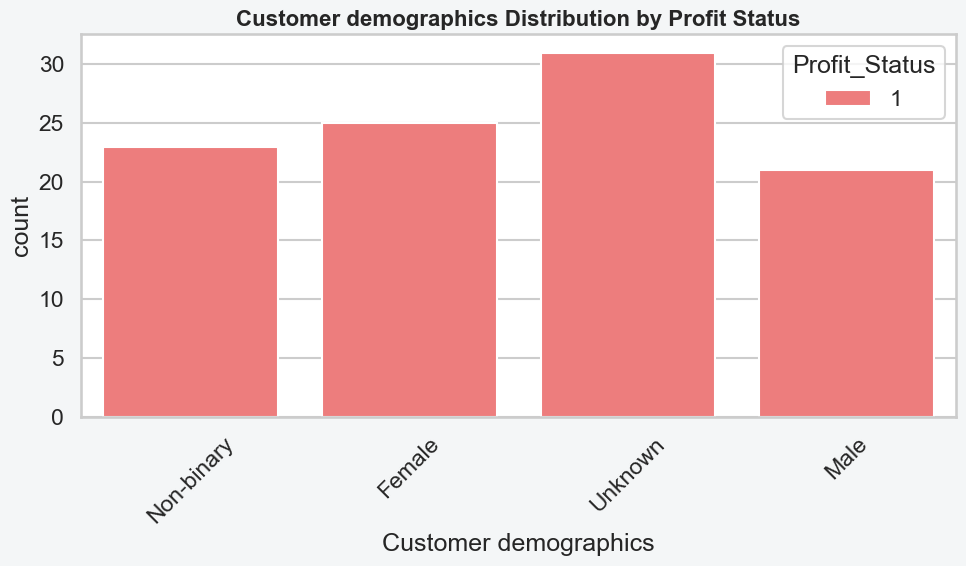

C:\Users\Rasmi Ranjan Behera\AppData\Local\Temp\ipykernel_15404\3726513213.py:14: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.countplot(


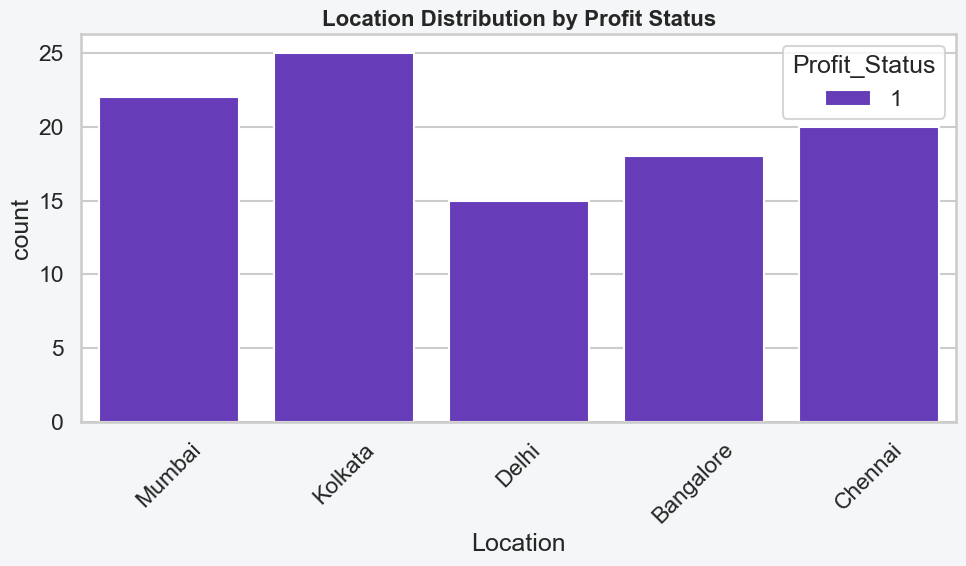

C:\Users\Rasmi Ranjan Behera\AppData\Local\Temp\ipykernel_15404\3726513213.py:14: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.countplot(


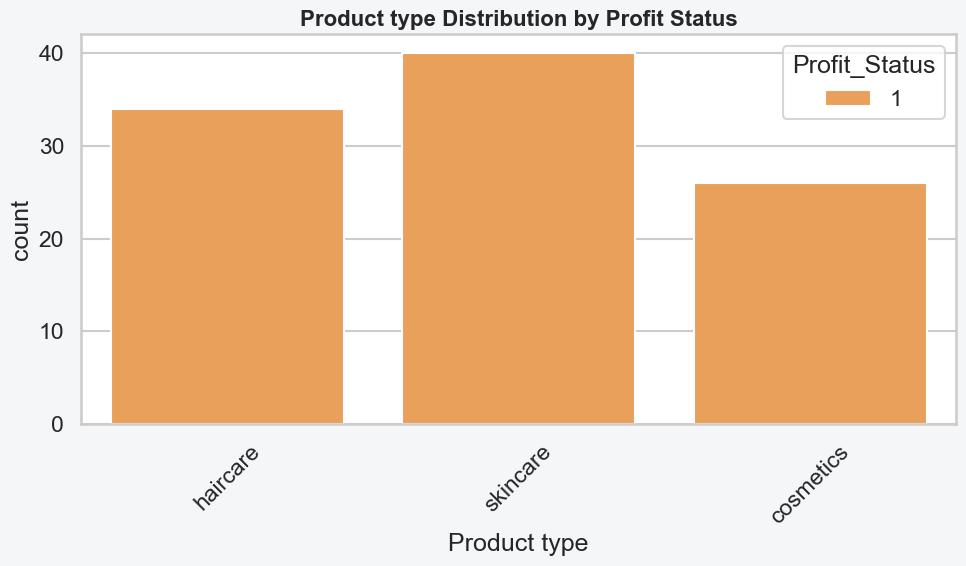

C:\Users\Rasmi Ranjan Behera\AppData\Local\Temp\ipykernel_15404\3726513213.py:14: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.countplot(


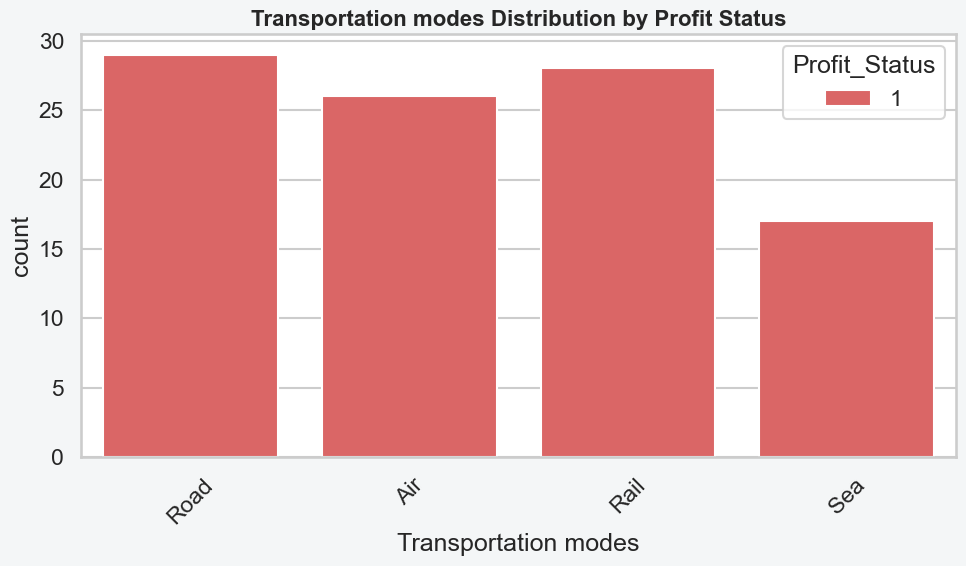

C:\Users\Rasmi Ranjan Behera\AppData\Local\Temp\ipykernel_15404\3726513213.py:14: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.countplot(


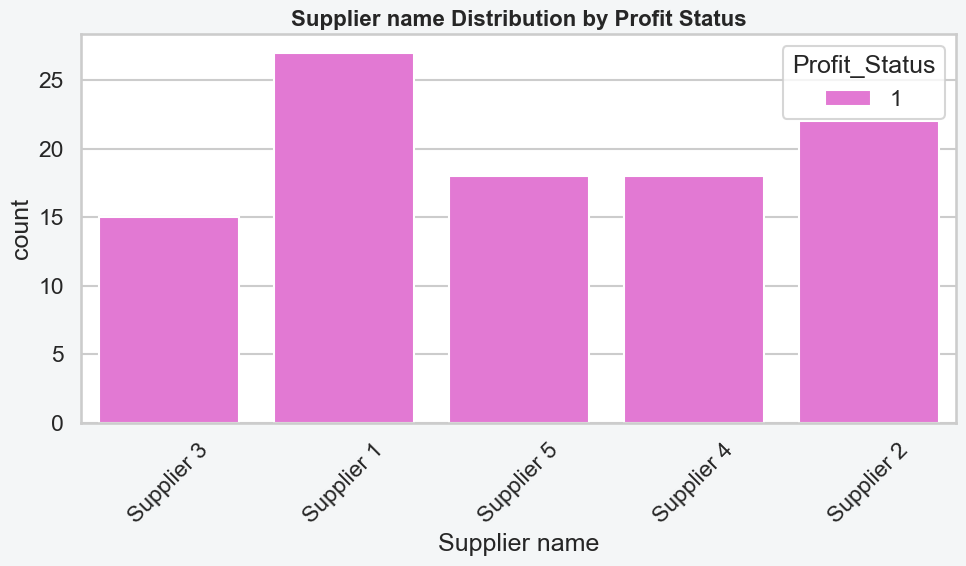

C:\Users\Rasmi Ranjan Behera\AppData\Local\Temp\ipykernel_15404\3726513213.py:14: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.countplot(


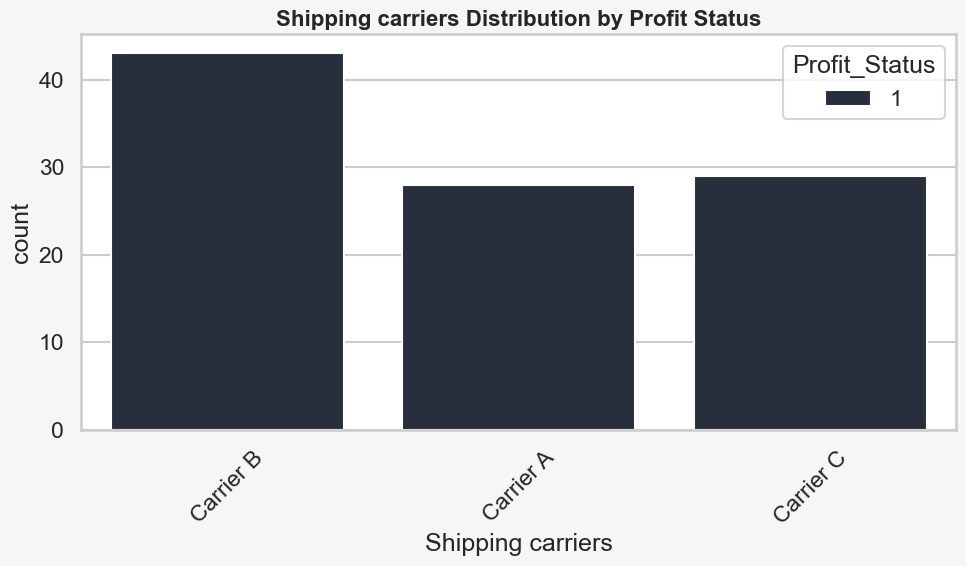

In [46]:
custom_palettes = [
    ["#FF6B6B", "#1DD1A1"],
    ["#5F27CD", "#00D2D3"],
    ["#FF9F43", "#10AC84"],
    ["#EE5253", "#2E86DE"],
    ["#F368E0", "#01A3A4"],
    ["#222F3E", "#F79F1F"]
]

for i, col in enumerate(categ_cols):

    plt.figure(figsize=(10,6))

    sns.countplot(
        data=data,
        x=col,
        hue="Profit_Status",
        palette=custom_palettes[i % len(custom_palettes)]
    )

    plt.title(f'{col} Distribution by Profit Status',
              fontsize=16, weight='bold')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
